In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# CSV 파일 불러오기
df = pd.read_csv("부산환경공단 일별 방류수 수질정보.csv")

In [3]:
# 날짜 문자열을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')

In [4]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### Rolling Mean

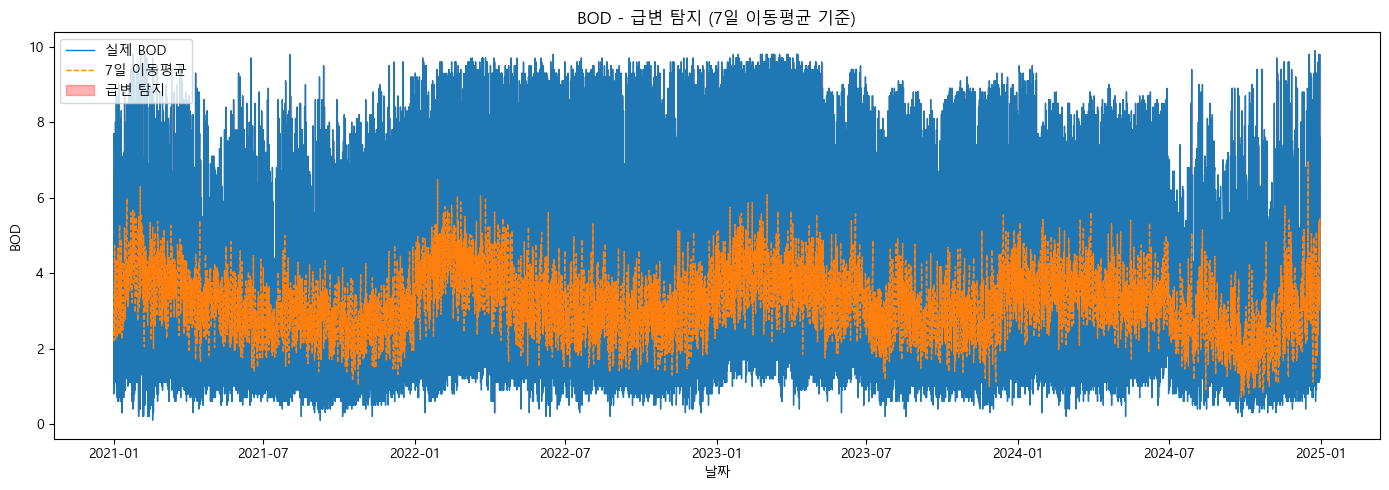

In [19]:
# 분석 대상 지표 : 'bod'
df_sorted = df.sort_values(by='날짜')

# 7일 이동 평균 구하기
df_sorted['bod_ma7'] = df_sorted['bod'].rolling(window=7, center=False).mean()

# 실제 값과 평균 간 차이
df_sorted['bod_diff'] = df_sorted['bod'] - df_sorted['bod_ma7']

# 차이가 큰 구간 (급변한 날짜 확인)
threshold = df_sorted['bod_diff'].std() * 2
df_sorted['급변_여부'] = df_sorted['bod_diff'].abs() > threshold

# 시각화
plt.figure(figsize=(14, 5))
plt.plot(df_sorted['날짜'], df_sorted['bod'], label='실제 BOD', linewidth=1)
plt.plot(df_sorted['날짜'], df_sorted['bod_ma7'], label='7일 이동평균', linestyle='--', linewidth=1)

# fill_between에서 min, max 사용 (음영 보이도록)
plt.fill_between(
    df_sorted['날짜'],
    df_sorted['bod'],
    df_sorted['bod_ma7'],
    where=df_sorted['급변_여부'],
    color='red', alpha=0.3, label='급변 탐지'
)

plt.title('BOD - 급변 탐지 (7일 이동평균 기준)')
plt.xlabel('날짜')
plt.ylabel('BOD')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
df_sorted['급변_여부'].value_counts()

급변_여부
False    13567
True      1043
Name: count, dtype: int64

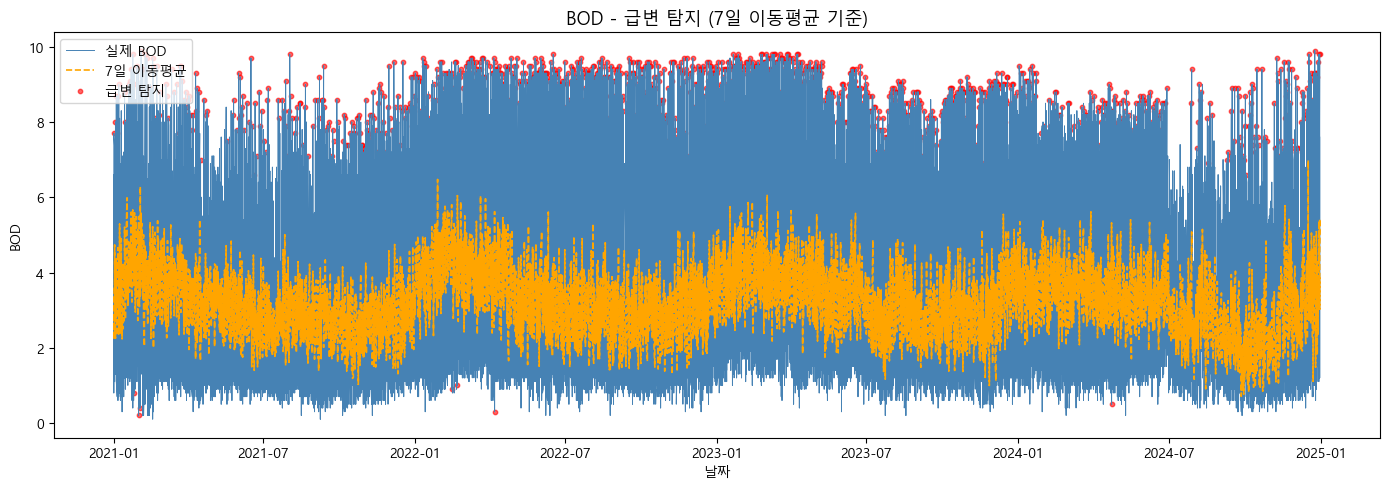

In [27]:
plt.figure(figsize=(14, 5))

# 실제 BOD
plt.plot(df_sorted['날짜'], df_sorted['bod'], label='실제 BOD', color='steelblue', linewidth=0.7)

# 이동 평균
plt.plot(df_sorted['날짜'], df_sorted['bod_ma7'], label='7일 이동평균', linestyle='--', color='orange', linewidth=1.2)

# 급변 지점만 빨간 점으로 표시
plt.scatter(df_sorted.loc[df_sorted['급변_여부'], '날짜'],
            df_sorted.loc[df_sorted['급변_여부'], 'bod'],
            color='red',
            label='급변 탐지',
            s=10, alpha=0.6)

# 그래프 세팅
plt.title('BOD - 급변 탐지 (7일 이동평균 기준)', fontsize=13)
plt.xlabel('날짜')
plt.ylabel('BOD')
plt.legend()
plt.tight_layout()
plt.show()

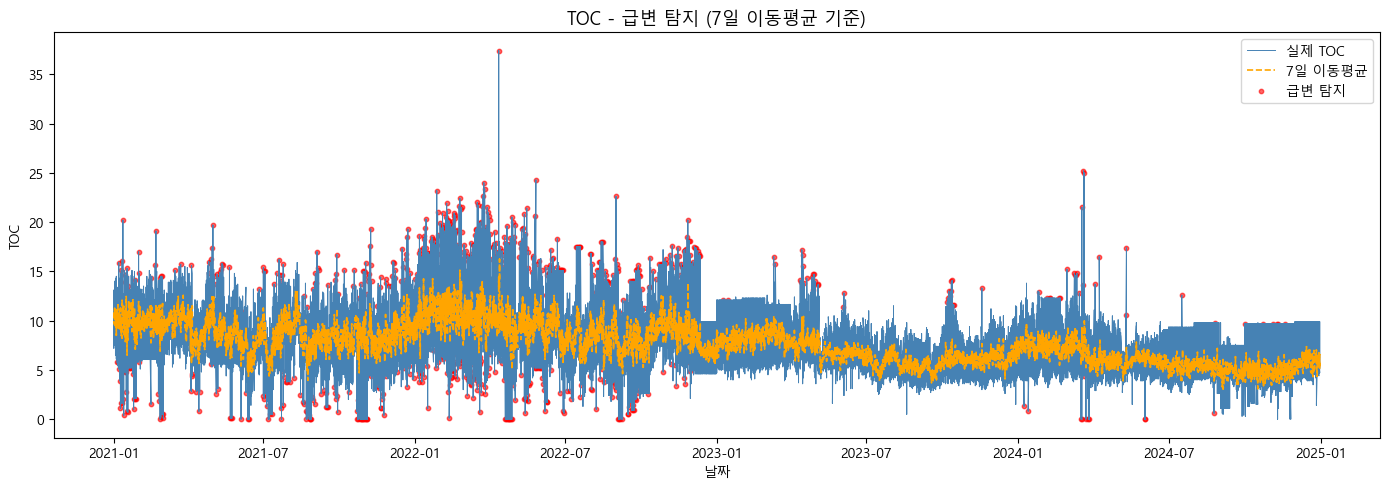

In [33]:
# 분석 대상 지표 : 'toc'
target = 'toc'
df_sorted = df.sort_values(by='날짜')

# 7일 이동 평균 계산
ma_col = f'{target}_ma7'
df_sorted[ma_col] = df_sorted[target].rolling(window=7, center=False).mean()

# 실제 값과 이동 평균의 차이 계산
diff_col = f'{target}_diff'
df_sorted[diff_col] = df_sorted[target] - df_sorted[ma_col]

# 급변 여부 판별 (임계값: std의 2배)
threshold = df_sorted[diff_col].std() * 2
df_sorted['급변_여부'] = df_sorted[diff_col].abs() > threshold

# 시각화
plt.figure(figsize=(14, 5))

# 실제 지표 값
plt.plot(df_sorted['날짜'], df_sorted[target], label=f'실제 {target.upper()}', color='steelblue', linewidth=0.7)

# 이동 평균
plt.plot(df_sorted['날짜'], df_sorted[ma_col], label='7일 이동평균', linestyle='--', color='orange', linewidth=1.2)

# 급변 탐지 지점 (빨간 점)
plt.scatter(df_sorted.loc[df_sorted['급변_여부'], '날짜'],
            df_sorted.loc[df_sorted['급변_여부'], target],
            color='red', label='급변 탐지', s=10, alpha=0.6)

# 그래프 세팅
plt.title(f'{target.upper()} - 급변 탐지 (7일 이동평균 기준)', fontsize=13)
plt.xlabel('날짜')
plt.ylabel(target.upper())
plt.legend()
plt.tight_layout()
plt.show()

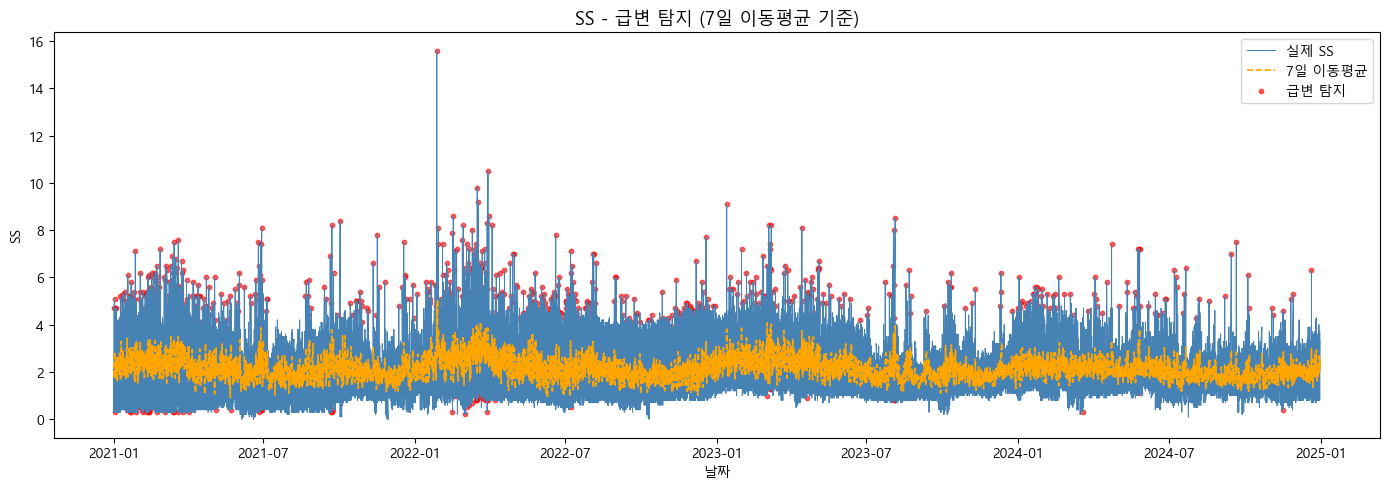

In [35]:
# 분석 대상 지표 : 'ss'
target = 'ss'
df_sorted = df.sort_values(by='날짜')

# 7일 이동 평균 계산
ma_col = f'{target}_ma7'
df_sorted[ma_col] = df_sorted[target].rolling(window=7, center=False).mean()

# 실제 값과 이동 평균의 차이 계산
diff_col = f'{target}_diff'
df_sorted[diff_col] = df_sorted[target] - df_sorted[ma_col]

# 급변 여부 판별 (임계값: std의 2배)
threshold = df_sorted[diff_col].std() * 2
df_sorted['급변_여부'] = df_sorted[diff_col].abs() > threshold

# 시각화
plt.figure(figsize=(14, 5))

# 실제 지표 값
plt.plot(df_sorted['날짜'], df_sorted[target], label=f'실제 {target.upper()}', color='steelblue', linewidth=0.7)

# 이동 평균
plt.plot(df_sorted['날짜'], df_sorted[ma_col], label='7일 이동평균', linestyle='--', color='orange', linewidth=1.2)

# 급변 탐지 지점 (빨간 점)
plt.scatter(df_sorted.loc[df_sorted['급변_여부'], '날짜'],
            df_sorted.loc[df_sorted['급변_여부'], target],
            color='red', label='급변 탐지', s=10, alpha=0.6)

# 그래프 세팅
plt.title(f'{target.upper()} - 급변 탐지 (7일 이동평균 기준)', fontsize=13)
plt.xlabel('날짜')
plt.ylabel(target.upper())
plt.legend()
plt.tight_layout()
plt.show()

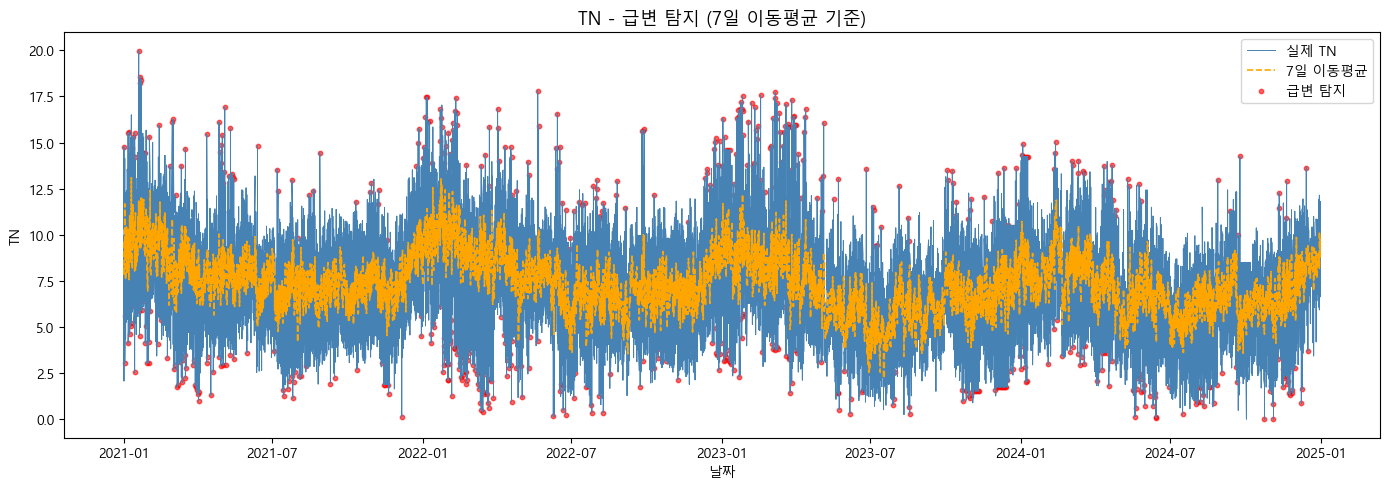

In [37]:
# 분석 대상 지표 : 'tn'
target = 'tn'
df_sorted = df.sort_values(by='날짜')

# 7일 이동 평균 계산
ma_col = f'{target}_ma7'
df_sorted[ma_col] = df_sorted[target].rolling(window=7, center=False).mean()

# 실제 값과 이동 평균의 차이 계산
diff_col = f'{target}_diff'
df_sorted[diff_col] = df_sorted[target] - df_sorted[ma_col]

# 급변 여부 판별 (임계값: std의 2배)
threshold = df_sorted[diff_col].std() * 2
df_sorted['급변_여부'] = df_sorted[diff_col].abs() > threshold

# 시각화
plt.figure(figsize=(14, 5))

# 실제 지표 값
plt.plot(df_sorted['날짜'], df_sorted[target], label=f'실제 {target.upper()}', color='steelblue', linewidth=0.7)

# 이동 평균
plt.plot(df_sorted['날짜'], df_sorted[ma_col], label='7일 이동평균', linestyle='--', color='orange', linewidth=1.2)

# 급변 탐지 지점 (빨간 점)
plt.scatter(df_sorted.loc[df_sorted['급변_여부'], '날짜'],
            df_sorted.loc[df_sorted['급변_여부'], target],
            color='red', label='급변 탐지', s=10, alpha=0.6)

# 그래프 세팅
plt.title(f'{target.upper()} - 급변 탐지 (7일 이동평균 기준)', fontsize=13)
plt.xlabel('날짜')
plt.ylabel(target.upper())
plt.legend()
plt.tight_layout()
plt.show()

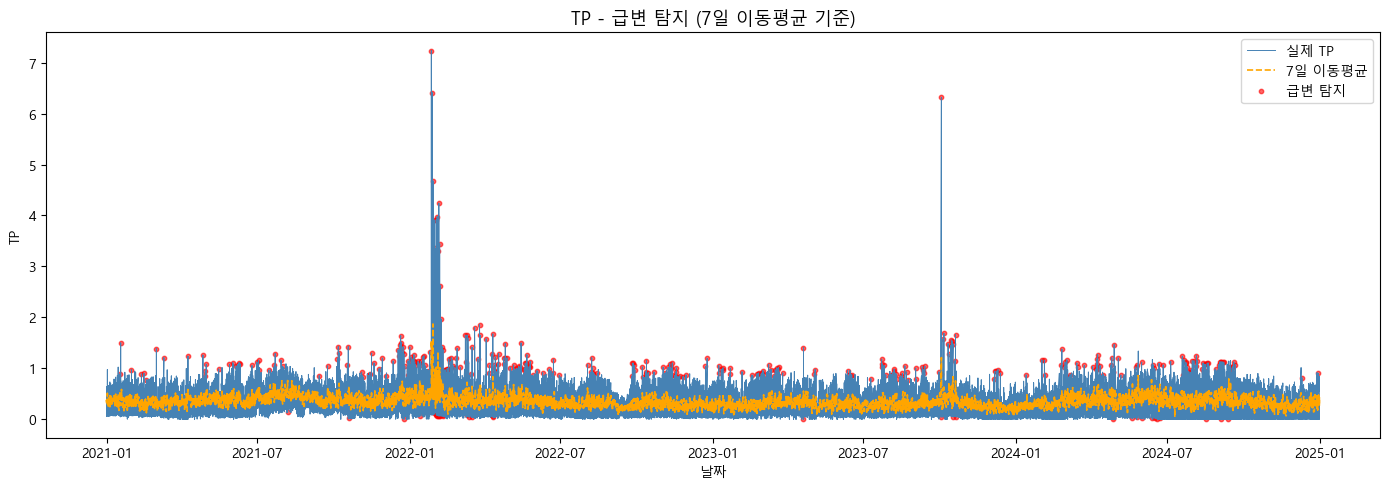

In [39]:
# 분석 대상 지표 : 'tp'
target = 'tp'
df_sorted = df.sort_values(by='날짜')

# 7일 이동 평균 계산
ma_col = f'{target}_ma7'
df_sorted[ma_col] = df_sorted[target].rolling(window=7, center=False).mean()

# 실제 값과 이동 평균의 차이 계산
diff_col = f'{target}_diff'
df_sorted[diff_col] = df_sorted[target] - df_sorted[ma_col]

# 급변 여부 판별 (임계값: std의 2배)
threshold = df_sorted[diff_col].std() * 2
df_sorted['급변_여부'] = df_sorted[diff_col].abs() > threshold

# 시각화
plt.figure(figsize=(14, 5))

# 실제 지표 값
plt.plot(df_sorted['날짜'], df_sorted[target], label=f'실제 {target.upper()}', color='steelblue', linewidth=0.7)

# 이동 평균
plt.plot(df_sorted['날짜'], df_sorted[ma_col], label='7일 이동평균', linestyle='--', color='orange', linewidth=1.2)

# 급변 탐지 지점 (빨간 점)
plt.scatter(df_sorted.loc[df_sorted['급변_여부'], '날짜'],
            df_sorted.loc[df_sorted['급변_여부'], target],
            color='red', label='급변 탐지', s=10, alpha=0.6)

# 그래프 세팅
plt.title(f'{target.upper()} - 급변 탐지 (7일 이동평균 기준)', fontsize=13)
plt.xlabel('날짜')
plt.ylabel(target.upper())
plt.legend()
plt.tight_layout()
plt.show()

### 표준편차 기반 불안정 사업단 랭킹

C:\Users\jasmi\AppData\Local\Temp\ipykernel_8284\715881885.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=std_df.reset_index(), x='std_평균', y='사업단', palette='coolwarm')


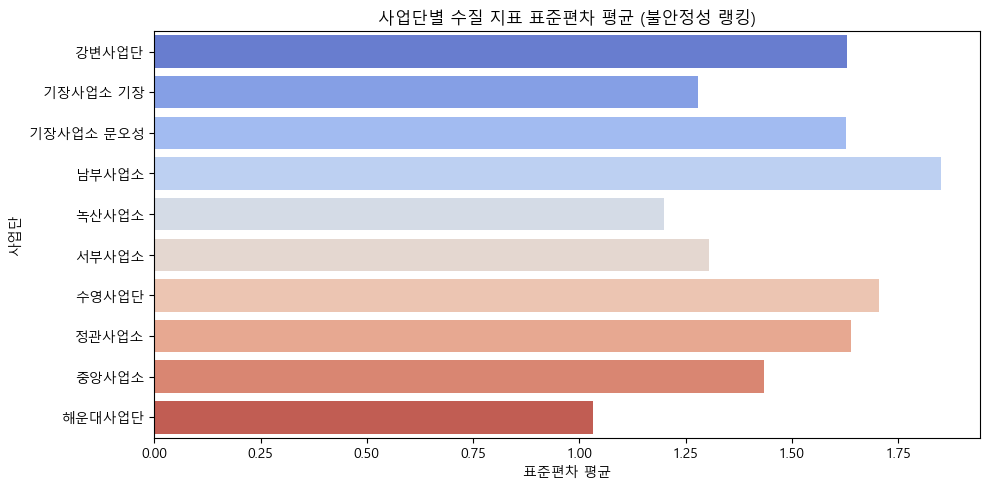

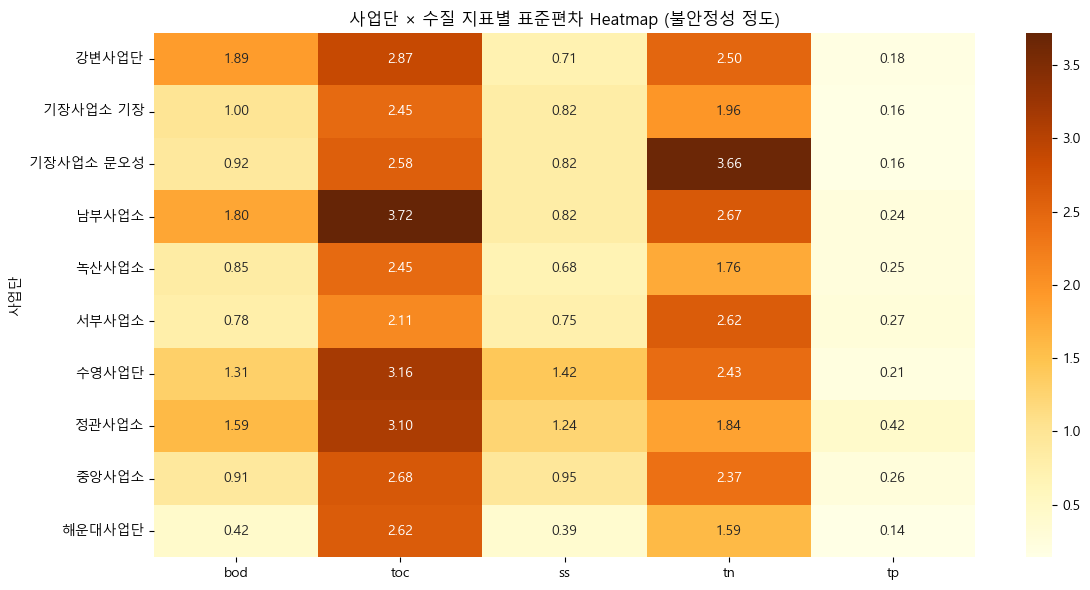

In [43]:
# 분석할 수질 지표
cols = ['bod', 'toc', 'ss', 'tn', 'tp']

# 표준편차 계산
std_df = df.groupby('사업단')[cols].std().round(2)

# 불안정성 점수: 평균, 합계 둘 다 구해보기
std_df['std_평균'] = std_df.mean(axis=1).round(3)
std_df['std_합계'] = std_df.sum(axis=1).round(3)

# ✅ 막대그래프 (std 평균 기준)
plt.figure(figsize=(10, 5))
sns.barplot(data=std_df.reset_index(), x='std_평균', y='사업단', palette='coolwarm')
plt.title("사업단별 수질 지표 표준편차 평균 (불안정성 랭킹)")
plt.xlabel("표준편차 평균")
plt.ylabel("사업단")
plt.tight_layout()
plt.show()

# ✅ 히트맵 (지표별 표준편차 전체 보기)
plt.figure(figsize=(12, 6))
sns.heatmap(std_df[cols], annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("사업단 × 수질 지표별 표준편차 Heatmap (불안정성 정도)")
plt.tight_layout()
plt.show()

### 정책 타겟 후보군 선정 로직 만들기

In [54]:
# 하수처리량 순위
top_treatment_biz = df.groupby('사업단')['하수처리량(㎥/일)'].mean().sort_values(ascending=False)
top_treatment_biz

사업단
강변사업단        403585.464750
수영사업단        349524.420260
남부사업소        316210.098563
녹산사업소         71625.336071
중앙사업소         68975.077344
해운대사업단        39536.699521
정관사업소         25297.036961
기장사업소 기장      24792.429158
서부사업소          7708.922656
기장사업소 문오성       778.075975
Name: 하수처리량(㎥/일), dtype: float64